In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
data=pd.read_csv('gdrive/My Drive/Colab Notebooks/preprocessed_data.csv')

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>

1. categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)

In [ ]:
y = data['project_is_approved'].values #Retreiving the output feature from the dataset
X = data.drop(['project_is_approved'], axis=1) #removing the output feature from the dataset

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

<h2>1.3 Make Data Model Ready: encoding eassay TF-IDF</h2>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*25)


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted TfidfVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)

(73196, 8) (73196,)
(36052, 8) (36052,)
After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


<h2>1.3 Make Data Model Ready: encoding eassay TF-IDF W2v </h2>

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-05-15 18:27:44--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.240.238
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.240.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  91.8MB/s    in 17s     

2020-05-15 18:28:00 (94.6 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
from gensim.models import KeyedVectors
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
import numpy as np
v1=[]
for qu1 in list(X_train["essay"]):
    ans_vec1= np.zeros(300)
    weight1=0
    for word1 in qu1.split(" "):
        try:
            vec1=word2vec.wv[word1]
            idf1 = word2tfidf[str(word1)]
            ans_vec1=vec1*idf
            weight1+=idf1
        except:
          pass
    if weight1!=0:
        ans_vec1/=weight1
    v1.append(ans_vec1)   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [ ]:
v2=[]
for qu2 in list(X_test["essay"]):
    ans_vec2= np.zeros(300)
    weight2=0
    for word2 in qu2.split(" "):
        try:
            vec2=word2vec.wv[word2]
            idf2 = word2tfidf[str(word2)]
            ans_vec2=vec2*idf
            weight2+=idf2
        except:
          pass
    if weight2!=0:
        ans_vec2/=weight2
    v2.append(ans_vec2)   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer()
vectorizer2.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the Categorical Feature to vector
x_train_school_state= vectorizer2.transform(X_train['school_state'].values)
x_test_school_state = vectorizer2.transform(X_test['school_state'].values)
print("After Vectorization")
print(x_train_school_state.shape, y_train.shape)
print(x_test_school_state.shape, y_test.shape)

After Vectorization
(73196, 51) (73196,)
(36052, 51) (36052,)


In [ ]:
vectorizer3 = CountVectorizer()
vectorizer3.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the Categorical Feature to vector
x_train_teacher_prefix= vectorizer3.transform(X_train['teacher_prefix'].values)
x_test_teacher_prefix = vectorizer3.transform(X_test['teacher_prefix'].values)
print("After Vectorization")
print(x_train_teacher_prefix.shape, y_train.shape)
print(x_test_teacher_prefix.shape, y_test.shape)

After Vectorization
(73196, 5) (73196,)
(36052, 5) (36052,)


In [ ]:
vectorizer4 = CountVectorizer()
vectorizer4.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the Categorical Feature to vector
x_train_p= vectorizer4.transform(X_train['project_grade_category'].values)
x_test_p = vectorizer4.transform(X_test['project_grade_category'].values)
print("After Vectorization")
print(x_train_p.shape, y_train.shape)
print(x_test_p.shape, y_test.shape)

After Vectorization
(73196, 4) (73196,)
(36052, 4) (36052,)


In [ ]:
vectorizer6 = CountVectorizer()
vectorizer6.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the Categorical Feature to vector
x_train_cc= vectorizer6.transform(X_train['clean_categories'].values)
x_test_cc = vectorizer6.transform(X_test['clean_categories'].values)
print("After Vectorization")
print(x_train_cc.shape, y_train.shape)
print(x_test_cc.shape, y_test.shape)

After Vectorization
(73196, 9) (73196,)
(36052, 9) (36052,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler5 = MinMaxScaler()
scaler5.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
x_train_t=scaler5.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
x_test_t=scaler5.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler8 = MinMaxScaler()
scaler8.fit(X_train['price'].values.reshape(-1, 1))
x_train_pr=scaler8.transform(X_train['price'].values.reshape(-1, 1))
x_test_pr=scaler8.transform(X_test['price'].values.reshape(-1, 1))

<h1>Sparse Matrix For Set - 1</h1>

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
x_train_set1=hstack((X_train_essay_bow,x_train_school_state,x_train_teacher_prefix,x_train_p,x_train_t,x_train_cc,x_train_t,x_train_pr)).tocsr()
x_test_set1=hstack((X_test_essay_bow,x_test_school_state,x_test_teacher_prefix,x_test_p,x_test_t,x_test_cc,x_test_t,x_test_pr)).tocsr()
print("Final Data matrix")
print(x_train_set1.shape, y_train.shape)
print(x_test_set1.shape, y_test.shape)

Final Data matrix
(73196, 5072) (73196,)
(36052, 5072) (36052,)


<h1>Sparse Matrix For Set - 2</h1>

In [ ]:
x_train_set2=hstack((v1,x_train_school_state,x_train_teacher_prefix,x_train_p,x_train_t,x_train_cc,x_train_t,x_train_pr)).tocsr()
x_test_set2=hstack((v2,x_test_school_state,x_test_teacher_prefix,x_test_p,x_test_t,x_test_cc,x_test_t,x_test_pr)).tocsr()
print("Final Data matrix")
print(x_train_set2.shape, y_train.shape)
print(x_test_set2.shape, y_test.shape)

Final Data matrix
(73196, 372) (73196,)
(36052, 372) (36052,)


<h1>Hyperparameter tuning with Set - 1</h1>

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_rand
from sklearn.tree import DecisionTreeClassifier

decisiontree= DecisionTreeClassifier()
parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}

clf1 = GridSearchCV(decisiontree, parameters, cv=10, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf1.fit(x_train_set1, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         

In [ ]:
#https://www.kaggle.com/shotashimizu/09-decisiontree-gridsearchcv
best_plist1 = clf1.best_params_
best_score1=clf1.best_score_
best_model1=clf1.best_estimator_
print("Best Hyperparameters are",best_plist1)
print("Best AUC score is",best_score1)
print("Best Estimator is",best_model1)

Best Hyperparameters are {'max_depth': 10, 'min_samples_split': 500}
Best AUC score is 0.6517723962568828
Best Estimator is DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
results= pd.DataFrame.from_dict(clf1.cv_results_)
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
param_max_depth= results['param_max_depth']
param_min_samples_split= results['param_min_samples_split']

In [ ]:
import plotly.graph_objs as go
import numpy as np
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=param_min_samples_split,y=param_max_depth,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=param_min_samples_split,y=param_max_depth,z=cv_auc, name = 'Cross validation')
data1 = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_samples_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC Score'),))

fig = go.Figure(data=data1, layout=layout)
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



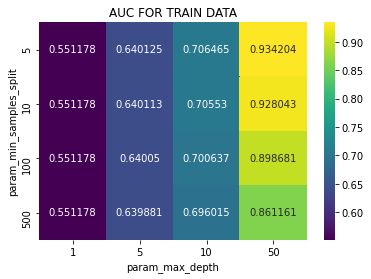

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df11=pd.DataFrame({"param_max_depth": list(param_max_depth),"param_min_samples_split": list(param_min_samples_split),"mean_test_score": list(cv_auc),"mean_train_score": list(train_auc)})
result = df11.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_train_score')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title("AUC FOR TRAIN DATA")
plt.show()

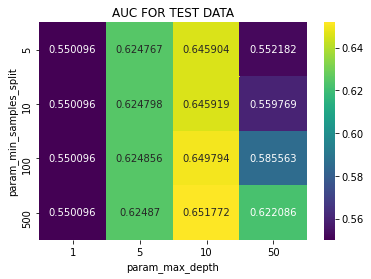

In [ ]:
result = df11.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_test_score')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title("AUC FOR TEST DATA")
plt.show()

<strong>Observations from the above data</strong>

1. If max_depth=1, The model will underfit
2. If max_depth=50, The model will overfit
3. The best hyper parameters are
     max_depth=10
     min_sample_split= 500

<h1>Training the model with best Parameters</h1>

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
tree_1= DecisionTreeClassifier(max_depth=10, min_samples_split=500)
tree_1.fit(x_train_set1, y_train)

y_train_pred1 =tree_1.predict_proba(x_train_set1)[:,1]
y_test_pred1 =tree_1.predict_proba(x_test_set1)[:,1]

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
ans3=auc(train_fpr1, train_tpr1)
ans4=auc(test_fpr1, test_tpr1)

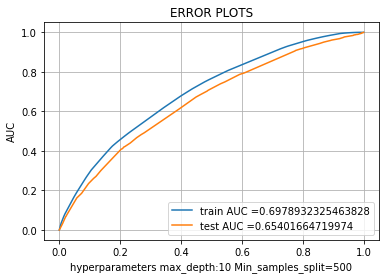

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(ans3))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(ans4))
plt.legend()
plt.xlabel("hyperparameters max_depth:10 Min_samples_split=500")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h2>Confusion Matrix</h2>

In [ ]:
from sklearn.metrics import confusion_matrix
predict_y=tree_1.predict(x_test_set1)
confusion_matrix(y_test, predict_y)

array([[  179,  5280],
       [  449, 30144]])

<h1>Hyperparameter tuning with Set - 2</h1> 

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_rand
from sklearn.tree import DecisionTreeClassifier

decisiontree2= DecisionTreeClassifier()
parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}

clf2 = GridSearchCV(decisiontree2, parameters, cv=10, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf2.fit(x_train_set2, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         

In [ ]:
#https://www.kaggle.com/shotashimizu/09-decisiontree-gridsearchcv
best_plist2 = clf2.best_params_
best_score2=clf2.best_score_
best_model2=clf2.best_estimator_
print("Best Hyperparameters are",best_plist2)
print("Best AUC score is",best_score2)
print("Best Estimator is",best_model2)

Best Hyperparameters are {'max_depth': 5, 'min_samples_split': 500}
Best AUC score is 0.6121339360000326
Best Estimator is DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
results2= pd.DataFrame.from_dict(clf1.cv_results_)
train_auc2= results2['mean_train_score']
cv_auc2 = results2['mean_test_score'] 
param_max_depth2= results2['param_max_depth']
param_min_samples_split2= results2['param_min_samples_split']

In [ ]:
# https://plot.ly/python/3d-axes/
trace3 = go.Scatter3d(x=param_min_samples_split2,y=param_max_depth2,z=train_auc2, name = 'train')
trace4 = go.Scatter3d(x=param_min_samples_split2,y=param_max_depth2,z=cv_auc2, name = 'Cross validation')
data2 = [trace3, trace4]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_samples_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC Score'),))

fig = go.Figure(data=data2, layout=layout)
fig.show()

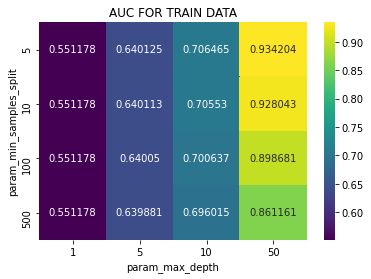

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df12=pd.DataFrame({"param_max_depth": list(param_max_depth2),"param_min_samples_split": list(param_min_samples_split2),"mean_test_score": list(cv_auc2),"mean_train_score": list(train_auc2)})
result11 = df12.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_train_score')
sns.heatmap(result11, annot=True, fmt="g", cmap='viridis')
plt.title("AUC FOR TRAIN DATA")
plt.show()

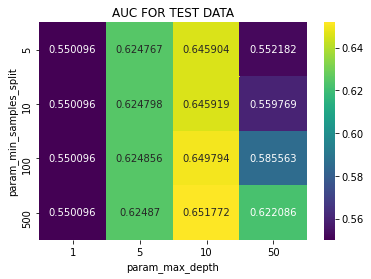

In [ ]:
result12 = df12.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_test_score')
sns.heatmap(result12, annot=True, fmt="g", cmap='viridis')
plt.title("AUC FOR TEST DATA")
plt.show()

<h1>Training the model with best Parameters</h1>

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
tree_2= DecisionTreeClassifier(max_depth=10, min_samples_split=500)
tree_2.fit(x_train_set2, y_train)

y_train_pred2 =tree_2.predict_proba(x_train_set2)[:,1]
y_test_pred2 =tree_2.predict_proba(x_test_set2)[:,1]

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)
ans3=auc(train_fpr2, train_tpr2)
ans4=auc(test_fpr2, test_tpr2)

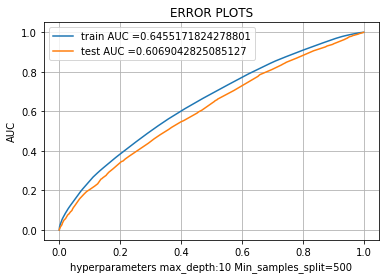

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(ans3))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(ans4))
plt.legend()
plt.xlabel("hyperparameters max_depth:10 Min_samples_split=500")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h1>Confusion Matrix</h1>

In [ ]:
from sklearn.metrics import confusion_matrix
predict_y1=tree_2.predict(x_test_set2)
confusion_matrix(y_test, predict_y1)

array([[   17,  5442],
       [   47, 30546]])

<h1>Plot the WordCloud with words of essay text of these false positive data points SET-2</h1>

---



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
def draw(actual,pred): 
  f_p=[]
  TP = 0
  FP = 0
  TN = 0
  FN = 0

  for i in range(len(pred)): 
        if actual[i]==pred[i]==1:
           TP += 1
        if pred[i]==1 and actual[i]!=pred[i]:
           FP += 1
           f_p.append(i)
        if actual[i]==pred[i]==0:
           TN += 1
        if pred[i]==0 and actual[i]!=pred[i]:
           FN += 1
  return f_p

In [ ]:
predict=tree_1.predict(x_test_set1)
f_p1=draw(y_test,predict)

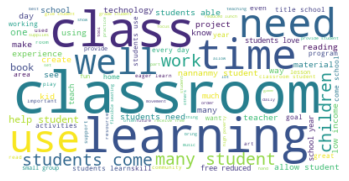

In [ ]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
from wordcloud import WordCloud,STOPWORDS
t1=""
stopwordss = set(STOPWORDS)
for i in f_p1:
  t=data.essay[i]
  t1+=t

text = t1
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwordss,background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h1>Plot the box plot with `price` of these `false positive data points` SET-2</h1>

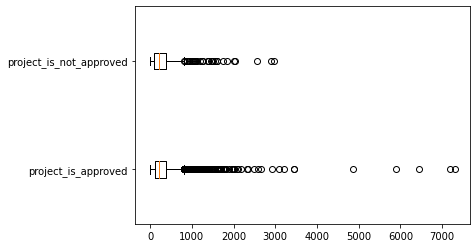

In [ ]:
#https://www.ritchieng.com/pandas-selecting-multiple-rows-and-columns/
#http://www.datasciencemadesimple.com/box-plot-in-python/
import matplotlib.pyplot as plt
t1=[]
t0=[]
for i in f_p1:
  if y_train[i]==1:
    t1.append(data.price[i])
  elif y_train[i]==0:
    t0.append(data.price[i])
box_plot_data=[t1,t0]
box=plt.boxplot(box_plot_data,vert=0,labels=['project_is_approved','project_is_not_approved'])

Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points` SET-2

In [ ]:
final=[]
for i in f_p1:
  l=[]
  l.append(data.iloc[i:i+1,3:4].values[0][0])
  l.append(data.iloc[i:i+1,4:5].values[0][0])
  final.append(l)

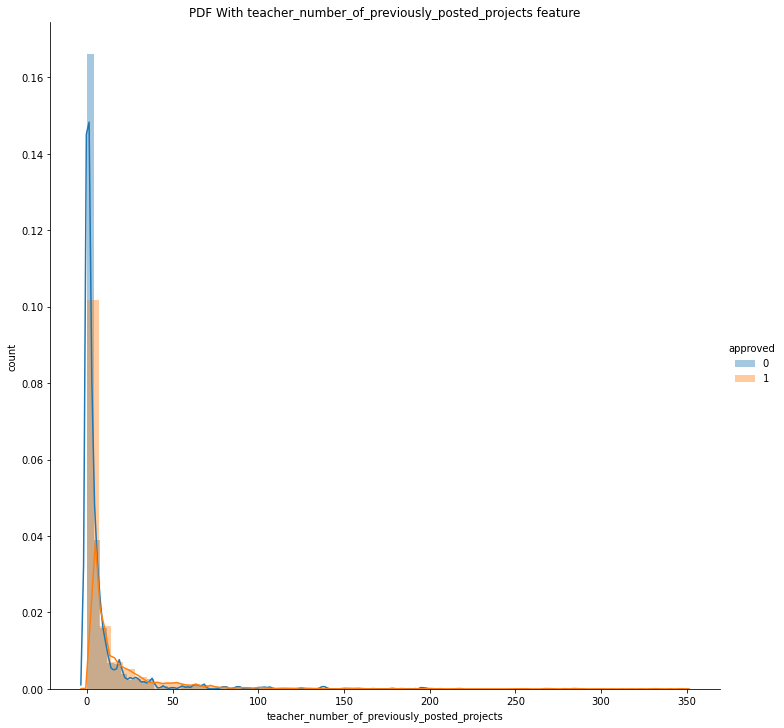

In [ ]:
final=pd.DataFrame(final,columns=['teacher_number_of_previously_posted_projects','approved'])
sns.FacetGrid(final, hue="approved", height=10) \
    .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
    .add_legend();

plt.ylabel("count")
plt.title("PDF With teacher_number_of_previously_posted_projects feature")
plt.show();

<h1>Select all the features which are having non-zero feature importance</h1>

In [ ]:
best_model=DecisionTreeClassifier()
best_model.fit(x_train_set1,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
feature_importance=best_model.feature_importances_  #Fetching the feature importance values from the model

In [ ]:
feature_list=[]
for i in range(len(feature_importance)):
  if feature_importance[i]>0:
    feature_list.append(i)

In [ ]:
x_new_train_set11=x_train_set1[:,feature_list]
x_new_test_set11=x_test_set1[:,feature_list]

In [ ]:
dt= DecisionTreeClassifier()
parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}

clf3 = GridSearchCV(dt, parameters, cv=10, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf3.fit(x_new_train_set11, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         

In [ ]:
#https://www.kaggle.com/shotashimizu/09-decisiontree-gridsearchcv
best_plist3 = clf3.best_params_
best_score3=clf3.best_score_
best_model3=clf3.best_estimator_
print("Best Hyperparameters are",best_plist3)
print("Best AUC score is",best_score3)
print("Best Estimator is",best_model3)

Best Hyperparameters are {'max_depth': 10, 'min_samples_split': 500}
Best AUC score is 0.6527157673619852
Best Estimator is DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
results3= pd.DataFrame.from_dict(clf1.cv_results_)
train_auc3= results3['mean_train_score']
cv_auc3 = results3['mean_test_score'] 
param_max_depth3= results3['param_max_depth']
param_min_samples_split3= results3['param_min_samples_split']

In [ ]:
# https://plot.ly/python/3d-axes/
trace5 = go.Scatter3d(x=param_min_samples_split3,y=param_max_depth3,z=train_auc3, name = 'train')
trace6 = go.Scatter3d(x=param_min_samples_split3,y=param_max_depth3,z=cv_auc3, name = 'Cross validation')
data3 = [trace5, trace6]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_samples_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC Score'),))

fig = go.Figure(data=data3, layout=layout)
fig.show()

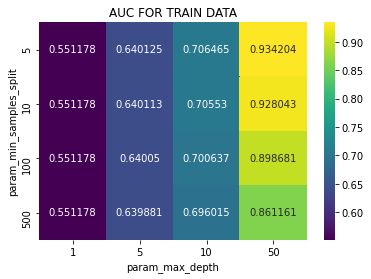

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df13=pd.DataFrame({"param_max_depth": list(param_max_depth3),"param_min_samples_split": list(param_min_samples_split3),"mean_test_score": list(cv_auc3),"mean_train_score": list(train_auc3)})
result13 = df13.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_train_score')
sns.heatmap(result13, annot=True, fmt="g", cmap='viridis')
plt.title("AUC FOR TRAIN DATA")
plt.show()

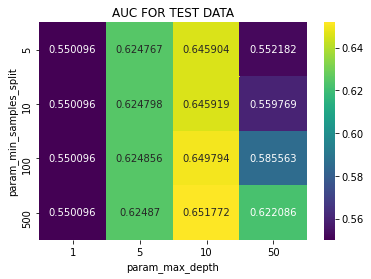

In [ ]:
result14 = df13.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_test_score')
sns.heatmap(result14, annot=True, fmt="g", cmap='viridis')
plt.title("AUC FOR TEST DATA")
plt.show()

<h1>Fitting the model with best Parameter</h1>

1. If max_depth=50, The model will overfit
2. The best hyper parameters are
     max_depth=10
     min_sample_split= 500

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
tree_22= DecisionTreeClassifier(max_depth=10, min_samples_split=500)
tree_22.fit(x_new_train_set11, y_train)

y_train_pred2 =tree_22.predict_proba(x_new_train_set11)[:,1]
y_test_pred2 =tree_22.predict_proba(x_new_test_set11)[:,1]

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)
ans3=auc(train_fpr2, train_tpr2)
ans4=auc(test_fpr2, test_tpr2)

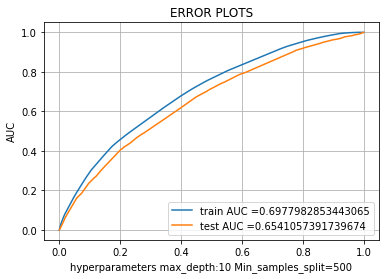

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(ans3))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(ans4))
plt.legend()
plt.xlabel("hyperparameters max_depth:10 Min_samples_split=500")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h1>Confusion Matrix</h1>

In [ ]:
from sklearn.metrics import confusion_matrix
predict_y=tree_22.predict(x_new_test_set11)
confusion_matrix(y_test, predict_y)

array([[  179,  5280],
       [  448, 30145]])

<h1>Retrieving The False Positive Data Points</h1>

In [ ]:
predict=tree_22.predict(x_new_test_set11)
f_p2=draw(y_test,predict)

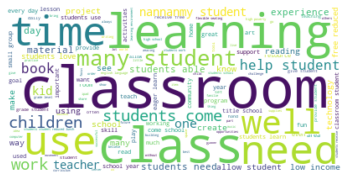

In [ ]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
from wordcloud import WordCloud,STOPWORDS
t1=""
stopwordss = set(STOPWORDS)
for i in f_p2:
  t=data.essay[i]
  t1+=t

text = t1
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwordss,background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

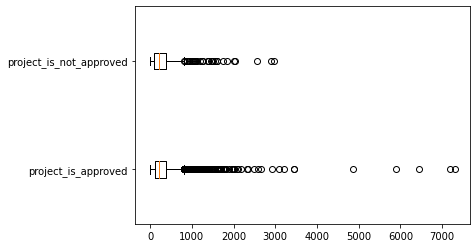

In [ ]:
#https://www.ritchieng.com/pandas-selecting-multiple-rows-and-columns/
#http://www.datasciencemadesimple.com/box-plot-in-python/
import matplotlib.pyplot as plt
t1=[]
t0=[]
for i in f_p2:
  if y_train[i]==1:
    t1.append(data.price[i])
  elif y_train[i]==0:
    t0.append(data.price[i])
box_plot_data=[t1,t0]
box=plt.boxplot(box_plot_data,vert=0,labels=['project_is_approved','project_is_not_approved'])

In [ ]:
final=[]
for i in f_p2:
  l=[]
  l.append(data.iloc[i:i+1,3:4].values[0][0])
  l.append(data.iloc[i:i+1,4:5].values[0][0])
  final.append(l)

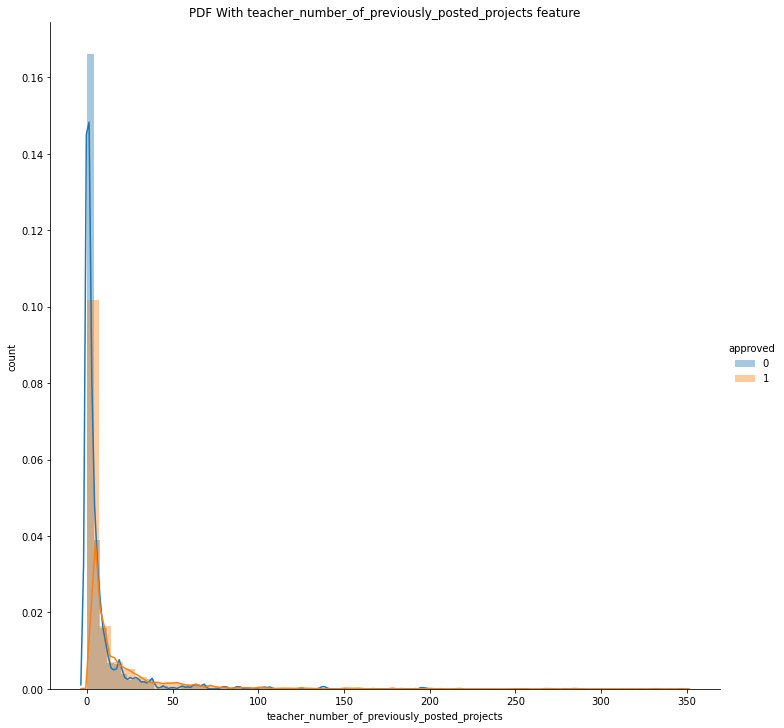

In [ ]:
final=pd.DataFrame(final,columns=['teacher_number_of_previously_posted_projects','approved'])
sns.FacetGrid(final, hue="approved", height=10) \
    .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
    .add_legend();

plt.ylabel("count")
plt.title("PDF With teacher_number_of_previously_posted_projects feature")
plt.show();

<h1>Summary</h1>

In [ ]:
dataa = [["TF-IDF","Decision Tree",best_plist1,65.4],["TF-IDF W2V","Decision Tree",best_plist2,60.6],["TF-IDF Feature Importance","Decision Tree",best_plist3,65.4]]
pd.DataFrame(dataa,columns=['Vectorizer','Model','Parameters','AUC'])

,Vectorizer,Model,Parameters,AUC
0,TF-IDF,Decision Tree,"{'max_depth': 10, 'min_samples_split': 500}",65.4
1,TF-IDF W2V,Decision Tree,"{'max_depth': 5, 'min_samples_split': 500}",60.6
2,TF-IDF Feature Importance,Decision Tree,"{'max_depth': 10, 'min_samples_split': 500}",65.4
